In [17]:
import pickle
import pandas as pd
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV
from sklearn.decomposition import PCA
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [18]:
df = pd.read_csv('./AB_NYC_2019.csv')
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [19]:
df.drop(['name','id','host_name','last_review'], axis=1, inplace=True)
df.dropna()
df = df.drop(df[df['price'] == 0].index)


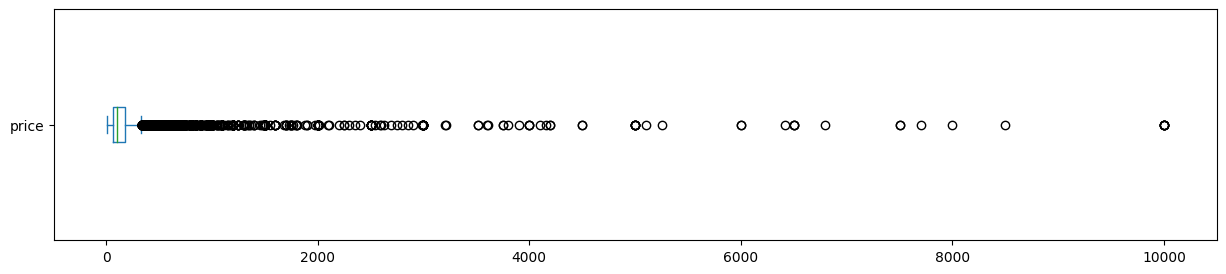

Values over $500.00: 
1044
2.1357%


Values equal to $0: 
0
0.0000%


In [20]:

# Displaying the box plot
df['price'].plot(kind='box', vert=False, figsize=(15,3))
plt.show()

# Calculating the number and the percentage of prices that are equal to 
500.00
print('Values over $500.00: ')
print(len(df[df['price'] > 500]))
print('{:.4f}%'.format((len(df[df['price'] > 500]) / df.shape[0]) * 100))
print('\n')
print('Values equal to $0: ')
print(len(df[df['price'] == 0]))
print('{:.4f}%'.format((len(df[df['price'] == 0]) / df.shape[0]) * 100))

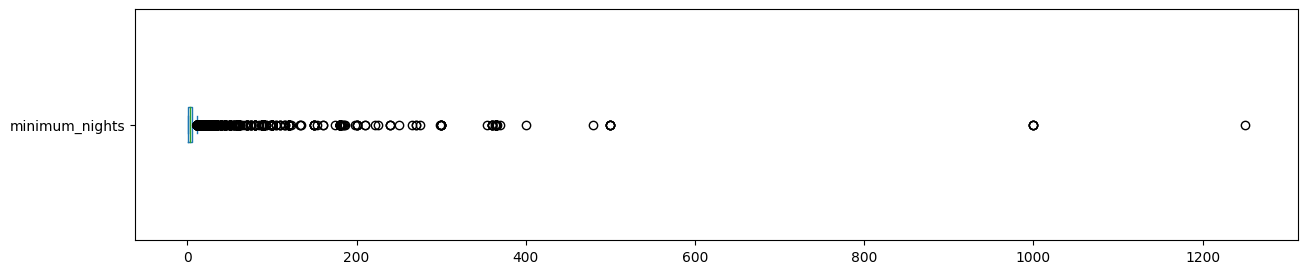

Values over 30 nights: 
747
1.5281%


In [21]:
# Displaying the box plot
df['minimum_nights'].plot(kind='box', vert=False, figsize=(15,3))
plt.show()

# Calculating the number and the percentage of rooms with the minimum nights value over 30
print('Values over 30 nights: ')
print(len(df[df['minimum_nights'] > 30]))
print('{:.4f}%'.format((len(df[df['minimum_nights'] > 30]) / df.shape[0]) * 100))

In [22]:

# Selecting the rows that fulfil the established requirements
df = df[(df['price'] <= 500) & (df['price'] > 0) & (df['minimum_nights'] <= 30)].copy()
df.reset_index()

,index,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
47120,48890,8232441,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,2,9
47121,48891,6570630,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,2,36
47122,48892,23492952,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,1,27
47123,48893,30985759,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,6,2


In [23]:
dataset = df[['price', 'room_type', 'neighbourhood_group', 'neighbourhood']]


# display the modified dataframe
print(dataset)

       price        room_type neighbourhood_group       neighbourhood
0        149     Private room            Brooklyn          Kensington
1        225  Entire home/apt           Manhattan             Midtown
2        150     Private room           Manhattan              Harlem
3         89  Entire home/apt            Brooklyn        Clinton Hill
4         80  Entire home/apt           Manhattan         East Harlem
...      ...              ...                 ...                 ...
48890     70     Private room            Brooklyn  Bedford-Stuyvesant
48891     40     Private room            Brooklyn            Bushwick
48892    115  Entire home/apt           Manhattan              Harlem
48893     55      Shared room           Manhattan      Hell's Kitchen
48894     90     Private room           Manhattan      Hell's Kitchen

[47125 rows x 4 columns]


In [28]:


room_type_cols = pd.get_dummies(dataset['room_type'])
dataset = dataset.merge(room_type_cols,left_index=True,right_index=True) # or concat(axis=1)
dataset


,price,room_type,neighbourhood_group,neighbourhood,Entire home/apt,Private room,Shared room
0,149,Private room,Brooklyn,Kensington,0,1,0
1,225,Entire home/apt,Manhattan,Midtown,1,0,0
2,150,Private room,Manhattan,Harlem,0,1,0
3,89,Entire home/apt,Brooklyn,Clinton Hill,1,0,0
4,80,Entire home/apt,Manhattan,East Harlem,1,0,0
...,...,...,...,...,...,...,...
48890,70,Private room,Brooklyn,Bedford-Stuyvesant,0,1,0
48891,40,Private room,Brooklyn,Bushwick,0,1,0
48892,115,Entire home/apt,Manhattan,Harlem,1,0,0
48893,55,Shared room,Manhattan,Hell's Kitchen,0,0,1


In [29]:
neighbourhood_group_cols = pd.get_dummies(dataset['neighbourhood_group'])
dataset = dataset.merge(neighbourhood_group_cols,left_index=True,right_index=True) # or concat(axis=1)
dataset

,price,room_type,neighbourhood_group,neighbourhood,Entire home/apt,Private room,Shared room,Bronx,Brooklyn,Manhattan,Queens,Staten Island
0,149,Private room,Brooklyn,Kensington,0,1,0,0,1,0,0,0
1,225,Entire home/apt,Manhattan,Midtown,1,0,0,0,0,1,0,0
2,150,Private room,Manhattan,Harlem,0,1,0,0,0,1,0,0
3,89,Entire home/apt,Brooklyn,Clinton Hill,1,0,0,0,1,0,0,0
4,80,Entire home/apt,Manhattan,East Harlem,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
48890,70,Private room,Brooklyn,Bedford-Stuyvesant,0,1,0,0,1,0,0,0
48891,40,Private room,Brooklyn,Bushwick,0,1,0,0,1,0,0,0
48892,115,Entire home/apt,Manhattan,Harlem,1,0,0,0,0,1,0,0
48893,55,Shared room,Manhattan,Hell's Kitchen,0,0,1,0,0,1,0,0


In [30]:
neighbourhood_cols = pd.get_dummies(dataset['neighbourhood'])
dataset = dataset.merge(neighbourhood_cols,left_index=True,right_index=True) # or concat(axis=1)
dataset

,price,room_type,neighbourhood_group,neighbourhood,Entire home/apt,Private room,Shared room,Bronx,Brooklyn,Manhattan,...,Westchester Square,Westerleigh,Whitestone,Williamsbridge,Williamsburg,Willowbrook,Windsor Terrace,Woodhaven,Woodlawn,Woodside
0,149,Private room,Brooklyn,Kensington,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,225,Entire home/apt,Manhattan,Midtown,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,150,Private room,Manhattan,Harlem,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,89,Entire home/apt,Brooklyn,Clinton Hill,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,80,Entire home/apt,Manhattan,East Harlem,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,70,Private room,Brooklyn,Bedford-Stuyvesant,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
48891,40,Private room,Brooklyn,Bushwick,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
48892,115,Entire home/apt,Manhattan,Harlem,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
48893,55,Shared room,Manhattan,Hell's Kitchen,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [35]:
y = dataset['price']
X = dataset.drop(['price', 'room_type', 'neighbourhood', 'neighbourhood_group'], axis=1)
features = [col for col in X]
X

,Entire home/apt,Private room,Shared room,Bronx,Brooklyn,Manhattan,Queens,Staten Island,Allerton,Arden Heights,...,Westchester Square,Westerleigh,Whitestone,Williamsbridge,Williamsburg,Willowbrook,Windsor Terrace,Woodhaven,Woodlawn,Woodside
0,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48891,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48892,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48893,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
scaled_data = preprocessing.scale(X)  
scaled_data

array([[-1.01999834,  1.0703523 , -0.15695451, ..., -0.04325353,
        -0.01527993, -0.07049017],
       [ 0.98039376, -0.93427182, -0.15695451, ..., -0.04325353,
        -0.01527993, -0.07049017],
       [-1.01999834,  1.0703523 , -0.15695451, ..., -0.04325353,
        -0.01527993, -0.07049017],
       ...,
       [ 0.98039376, -0.93427182, -0.15695451, ..., -0.04325353,
        -0.01527993, -0.07049017],
       [-1.01999834, -0.93427182,  6.37127268, ..., -0.04325353,
        -0.01527993, -0.07049017],
       [-1.01999834,  1.0703523 , -0.15695451, ..., -0.04325353,
        -0.01527993, -0.07049017]])

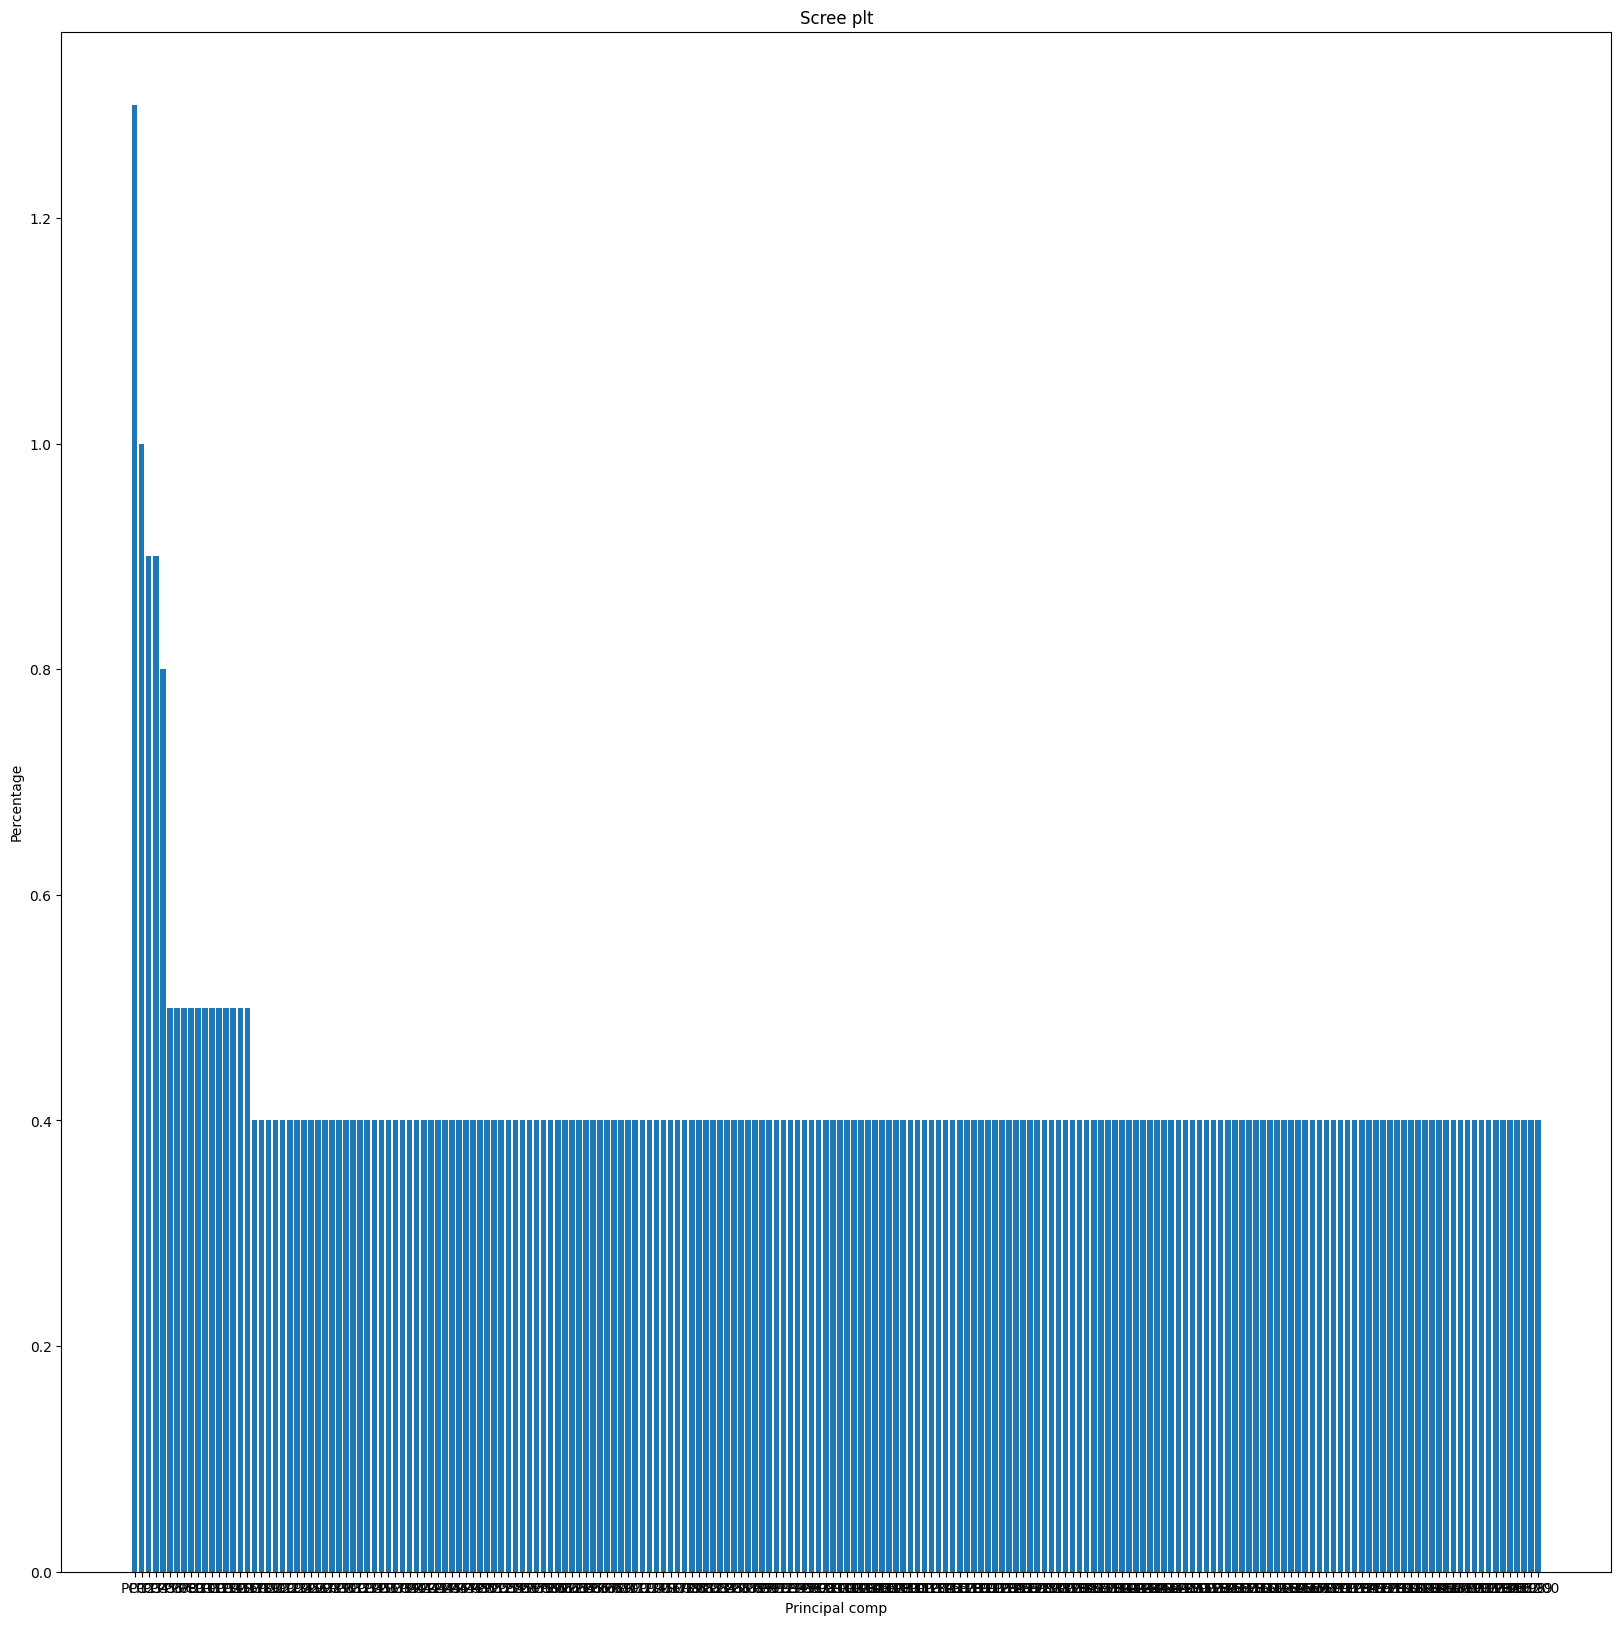

In [41]:
pca = PCA(n_components=200)
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)

per_var = np.round(pca.explained_variance_ratio_* 100,decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var) + 1)]

plt.figure(figsize=(20, 20))
plt.bar(x = range(1,len(per_var)+1),height=per_var,tick_label = labels)
plt.ylabel('Percentage')
plt.xlabel('Principal comp')
plt.title('Scree plt')
plt.show()

In [48]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pca = PCA(n_components=100)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Fit a linear regression model to predict yield using PC1 and PC2
reg = LinearRegression()
reg.fit(X_train_pca, y_train)

# Compute the R^2 score for the training set
y_train_pred = reg.predict(X_train_pca)
r2_train = r2_score(y_train, y_train_pred)

# Compute the R^2 score for the test set
y_test_pred = reg.predict(X_test_pca)
r2_test = r2_score(y_test, y_test_pred)

print(f"R^2 score for training set: {r2_train}")
print(f"R^2 score for test set: {r2_test}")

R^2 score for training set: 0.42375900407927025
R^2 score for test set: 0.40389469290630453
